In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


In [2]:
img = image.load_img("basedata/training/happy/13.png")

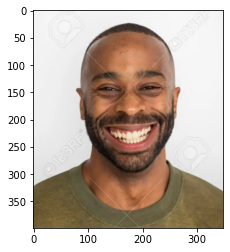

In [3]:
plt.imshow(img)

In [5]:
cv2.imread("basedata/training/happy/13.png").shape

(399, 348, 3)

In [7]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [8]:
train_dataset = train.flow_from_directory('basedata/training/', 
                                          target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = validation.flow_from_directory('basedata/validation/', 
                                          target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 34 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'happy': 0, 'not_happy': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##flatten
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation='sigmoid'),
                                    ])

In [12]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop (learning_rate = 0.001),
             metrics = ['accuracy'])

In [14]:
model_fit = model.fit(train_dataset,
                     epochs = 10,
                     validation_data = validation_dataset)

Epoch 1/10
12/12 [==============================] - 2s 139ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.4134 - val_accuracy: 0.8000
Epoch 2/10
12/12 [==============================] - 2s 144ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4299 - val_accuracy: 0.7000
Epoch 3/10
12/12 [==============================] - 2s 135ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6667 - val_accuracy: 0.6000
Epoch 4/10
12/12 [==============================] - 2s 139ms/step - loss: 2.6867e-04 - accuracy: 1.0000 - val_loss: 0.6497 - val_accuracy: 0.6000
Epoch 5/10
12/12 [==============================] - 2s 140ms/step - loss: 1.3583e-04 - accuracy: 1.0000 - val_loss: 0.6446 - val_accuracy: 0.6000
Epoch 6/10
12/12 [==============================] - 2s 141ms/step - loss: 8.7954e-05 - accuracy: 1.0000 - val_loss: 0.6350 - val_accuracy: 0.6000
Epoch 7/10
12/12 [==============================] - 2s 136ms/step - loss: 4.3075e-05 - accuracy: 1.0000 - val_loss: 1.1229 - val_accurac

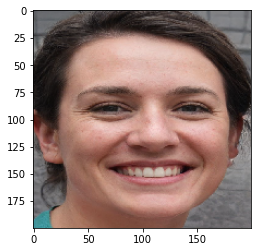

1/1 [==============================] - 0s 94ms/step
you are not happy


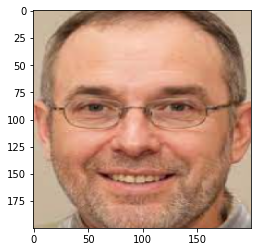

1/1 [==============================] - 0s 24ms/step
you are not happy


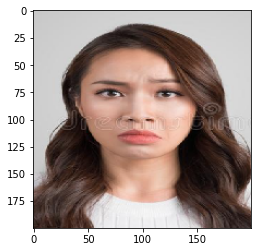

1/1 [==============================] - 0s 20ms/step
you are happy


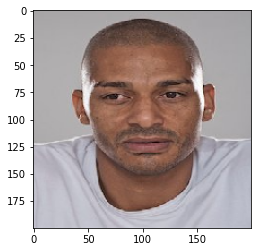

1/1 [==============================] - 0s 20ms/step
you are not happy


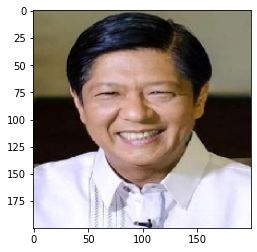

1/1 [==============================] - 0s 22ms/step
you are not happy


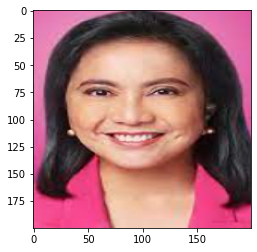

1/1 [==============================] - 0s 21ms/step
you are not happy


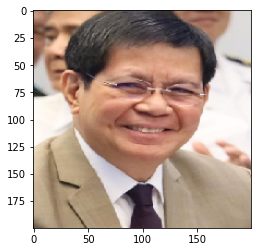

1/1 [==============================] - 0s 22ms/step
you are happy


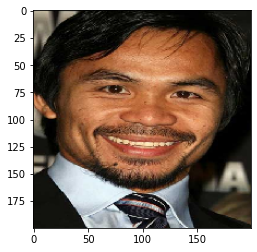

1/1 [==============================] - 0s 22ms/step
you are not happy


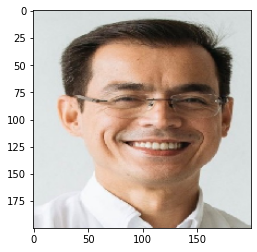

1/1 [==============================] - 0s 23ms/step
you are happy


In [16]:
dir_path = 'basedata/testing'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+ i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack ([X])
    val = model.predict(images)
    if val == 1:
        print("you are not happy")
    else:
        print("you are happy")
   